# Module 3B: Advanced Numerical Techniques and Potential Ethical Concerns (part 1)

## Neural Networks

Neural Networks are one of the most powerfull techniques in Computer Science. They are computational systems vaguely inspired by the biological neural networks of animal brains.

The image shows two neurons connected with each other. In this image, we can identify three important properties:

- **Dendrites:** correspond to the input "wires" that receive sensory information. Dendrites are the segments of the neuron that receive stimulation in order for the cell to become active. They conduct electrical messages to the neuron cell body for the cell to function

- **Axon:** corresponds to the body of the neuron. It is a long slender projection of a nerve cell, or neuron, that conducts electrical impulses away from the neuron's cell body or soma.

- **Synapses:** correspond to the output "wires". When a nerve impulse reaches the synapse at the end of a neuron, it cannot pass directly to the next one. Instead, it triggers the neuron to release a chemical neurotransmitter. The neurotransmitter drifts across the gap between the two neurons.



<img src="./graphics/neuron.jpg" />

## Rosenblatt's Perceptron: the first neuron

A neuron is a computational unit that receives a number of **inputs** through the **dendrites**, performs some **computations** and then it sends **outputs** to the **synapses** via the **axon** to the other neurons in the brain. Neurons communicate with each other through some pulses of electricity also called spikes.

<img src="https://cdn-images-1.medium.com/max/800/1*o7aTsRvL1NocOCHqYTKi2g.png" />




Assuming that data is linearly separable, the goal of the perceptron is to correctly classify the set of patterns into one of two classes.

### Activation Functions in Neural Networks (and Deep Neural Networks)

<img src='https://www.pyimagesearch.com/wp-content/uploads/2018/12/keras_conv2d_activation_functions.png' />

## Remember the Machine Learning Process:

<img src="./graphics/forecast.png" />

In [4]:
# update for tensorflow

# pytorch -> oop
# tensorflow -> more diffcult to learn - abstract
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import numpy as np
import seaborn as sns
import random as rn
import re
import warnings
import csv

import tensorflow as tf
# Force TensorFlow to single thread
# Multiple threads are a potential source of non-reprocible research resulsts
session_conf = tf.compat.v1.ConfigProto( intra_op_parallelism_threads=1, inter_op_parallelism_threads=1 )

# tf.set_random_seed() will make random number generation in the TensorFlow backend
# have a well defined initial state
# more details: https://www.tensorflow.org/api_docs/python/tf/set_random_seed
tf.compat.v1.set_random_seed(515)

# keras / deep learning libraries
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model

# callbacks
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.image as mpimg
import pylab as pl
from pylab import savefig
plt.style.use('seaborn-deep')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,MinMaxScaler
from sklearn.metrics import roc_curve, auc

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Figure Plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot
import seaborn as sns
sns.set()

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# mlp for the two circles classification problem
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from keras.initializers import RandomUniform


In [5]:
# Auxiliary function to plot decision boundaries
def plot_decision_boundary(X, y, model, encoder, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 100
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = encoder.inverse_transform((model.predict(np.c_[xx.ravel(), yy.ravel()]))).ravel()

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=enc.inverse_transform(y), cmap=cmap, lw=0)
    
    return fig, ax

## Using Learning Network with ReLu Activation



In workshop 2B, you had to classify a breast tumour dataset using Naive Bayes algorithm. In this task, you will do classify again the dataset, but using:

- (1) a neural network with the 'tanh' as the activation function (you can choose as many hidden layers as you want)
- (2) a deep neural network with the 'relu' activation function (you can choose as many hidden layers as you want)

In [6]:
# Let's revisit the breast cancer dataset

file_path = 'data/breast_data_simple_v2.csv'
data = pd.read_csv( file_path )
data

,diagnosis,radius_mean,texture_mean
0,1,17.99,10.38
1,1,20.57,17.77
2,1,19.69,21.25
3,1,11.42,20.38
4,1,20.29,14.34
...,...,...,...
2271,1,21.54,22.41
2272,1,20.11,28.27
2273,1,16.58,28.10
2274,1,20.58,29.35


In [7]:
X = data[["radius_mean", "texture_mean"]]
y = data["diagnosis"]

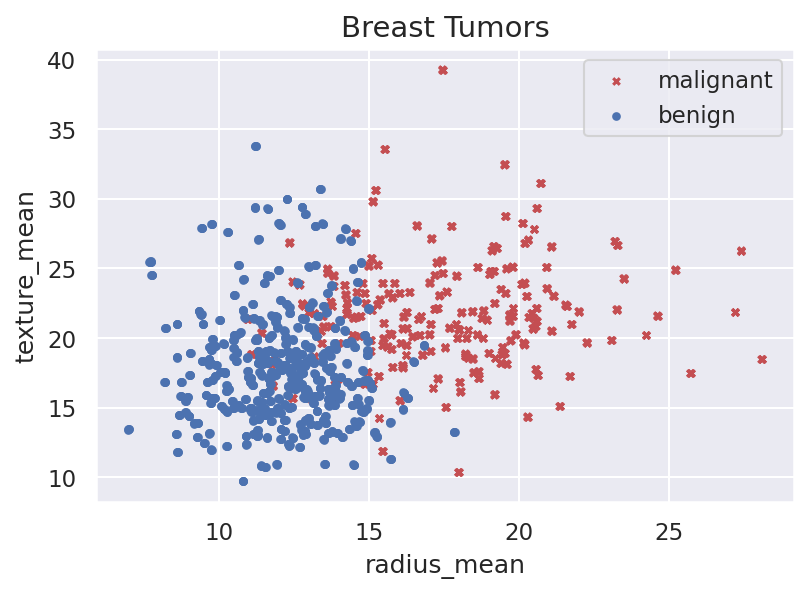

In [13]:
# for plotting purposes:
# separate the benign tumors (diagnosis = 0) from the malignant ones (diagnosis = 1)
malignant = data[ data[ 'diagnosis'] == 1]
benign = data[ data[ 'diagnosis'] == 0]

# need to convert dataframe into a matrix in order to make the plot work
x = X.to_numpy()

# plot figure
fig=plt.figure(dpi=150)

plt.scatter(malignant['radius_mean'], malignant['texture_mean'], c='r', marker='x', s=10, label='malignant', cmap='RdBu')
plt.scatter(benign['radius_mean'], benign['texture_mean'], c='b', marker='o', s=10, label='benign', cmap='RdBu')
plt.ylabel('texture_mean', fontsize=12)
plt.xlabel('radius_mean', fontsize=12)
plt.title('Breast Tumors', fontsize=14)
plt.legend()
plt.show()

In [8]:
# Encoding data
# This process is to numeric the results 
# e.g. Has Cancer, No Cancer -> convert it to be 1 0 


# Encode features
n_features = X.shape[1]
# Count number of Catergoires
n_classes = len(data['diagnosis'].unique())

# create numerical encoding for attribute species
enc = OneHotEncoder()
# Encoding Y array 
Y = enc.fit_transform(y[:, np.newaxis]).toarray()
Y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [10]:

# separate the dataset into test set, validation set and train set
# YOUR CODE HERE:
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3 )
# create the training set and the test set

# ======================================================
# Split to training and test 
# 70% training 30% test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 515)
# ======================================================

# ======================================================
# Validation set 
# 50% of my true test set
# Validation set is half of test set
X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state = 515)
# ======================================================

# model of tumor with sequential layer

# define the Machine Learning Model: Neural Network
# YOUR CODE HERE:
model_tum = Sequential()

# ======================================================
# Sequential Layer, add Layer 1 ->>> Input layer
# In tensorflow Neural Network call dense
# Dense -> Neural Network
# -------------------------------------------
# 10 Neural, use X_train.shape[1] as -> Number of dimension
# Define activation function tanh -> hyperbolic tension

# X_train.shape[1]
# model_tum.add(Dense(10, input_dim=X_train.shape[1], activation='tanh'))


# -------------------------------------------
# hidden Layer
# Because this is not in a input layer -> No input_dim=2 specify
# model_tum.add(Dense(7, activation='tanh'))

# You always need to apply the sequence of the previous one 

# Hidden Layer means after the input layer, you don't have control on Hidden layer
# It is important to disperse it 
# the sparsity enhance computation everything will be zero


# Output layer -> sigmoid usually is the last activation Fun
# num_class = len(np.unique(y))
# model_tum.add(Dense(num_class, activation='sigmoid'))

# -------------------------------------------
# The right Neural Network arhertiture has to be turned by ourselves
# It comes from trial and error 
# -------------------------------------------

# We could run into overfitting
# try layer after layer -> and then see whether it would break(overfitting)
# After one layer work -> goes to other layer


# use pre-trained model -> and then adjust

# ============================================================================================================


# add the required layers
# YOUR CODE HERE:
model_tum.add(Dense(10, input_dim=2, activation='tanh'))

model_tum.add(Dense(7, activation='tanh'))
model_tum.add(Dense(3, activation='tanh'))
model_tum.add(Dense(2, activation='sigmoid'))

# --------------------------------------------------------
# And then go to find minimum of error function 

# Use optimizer='nadam' -> to find minimum of error function 
# na dam -> minimum of error function 

# Loss -> Error
# loss function  -> mean error function
# loss function different -> Problem of Catergoricl data -> different from contiouns data  
# Output config different

# contiouns data  -> loss function is MSE 
# Categorical data -> 1 of them is categorical_crossentropy
# measure an error 

# Real value -> House price

# model_tum.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
# --------------------------------------------------------
# compile the network using: 
# the 'mean_squared_error' as a loss function
# the stochastic gradient descent ('sgd') as the optimization function
# and the 'accuracy' as evaluation metric
# YOUR CODE HERE:

model_tum.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])


# Last step is to fit the model 
# Epoch -> iteration  -> since the network model goes forward and backward, it is saying how many times it should go


# fit the model to the data -> learning the model
# YOUR CODE HERE:
# fit model

# Most 150 iteration

# Flag verbose - mean output in detail way

# Start with Verbose=1

history = model_tum.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=150, verbose=1)
history

Epoch 1/150
50/50 [==============================] - 1s 3ms/step - loss: 0.7314 - accuracy: 0.4677 - val_loss: 0.6243 - val_accuracy: 0.6199
Epoch 2/150
50/50 [==============================] - 0s 1ms/step - loss: 0.6185 - accuracy: 0.6243 - val_loss: 0.5982 - val_accuracy: 0.6199
Epoch 3/150
50/50 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.7091 - val_loss: 0.5785 - val_accuracy: 0.7018
Epoch 4/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5740 - accuracy: 0.7399 - val_loss: 0.5667 - val_accuracy: 0.7427
Epoch 5/150
50/50 [==============================] - 0s 900us/step - loss: 0.5701 - accuracy: 0.7753 - val_loss: 0.5453 - val_accuracy: 0.8012
Epoch 6/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5442 - accuracy: 0.7948 - val_loss: 0.5272 - val_accuracy: 0.8070
Epoch 7/150
50/50 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.8102 - val_loss: 0.5137 - val_accuracy: 0.8129
Epoch 8/150

In [44]:
# visualise NN
#ann_viz(model_tum, view=True, filename='breast_cancer')

# Next thing is visualize the model

In [45]:
# evaluate the model
# evaluate the model
_, train_acc = model_tum.evaluate(X_train, Y_train, verbose=1)
_, test_acc = model_tum.evaluate(X_test, Y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))


11/11 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.8944
Train: 0.909, Test: 0.894


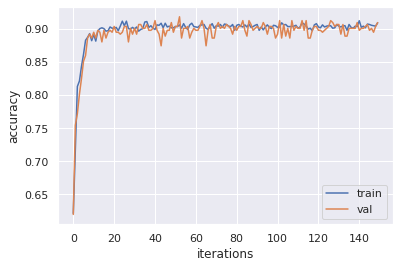

In [46]:
# plot training history
# This is the visulized training process, 
# From very low accurracy to high
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='val')
pyplot.ylabel('accuracy', fontsize=12)
pyplot.xlabel('iterations', fontsize=12)
pyplot.legend()
pyplot.show()

# ========================================
# The orange and blue line can not be too wide
# Can not be too much gap

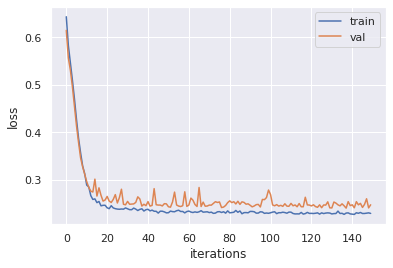

In [47]:
# plot training history
# Loss -> Error, Error is going down

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.ylabel('loss', fontsize=12)
pyplot.xlabel('iterations', fontsize=12)
pyplot.legend()
pyplot.show()

# ========================================
# The orange and blue line can not be too wide
# Can not be too much gap

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

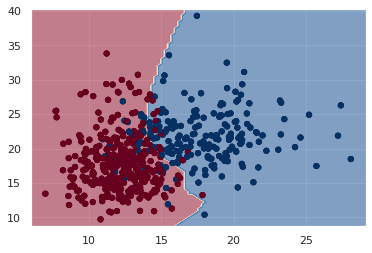

In [48]:
# Plot the decision boundary
# For more colors, please check here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# Navie Bayies -> since it is probability base, in this simple problem

plot_decision_boundary(X.values, Y, model_tum, enc, cmap='RdBu')

## Examples of Bad Learned Models

In [12]:
# plot training curves
def plot_training_curve(history):
    
    f, axarr = plt.subplots(1,2)
    f.set_figheight(5)
    f.set_figwidth(10)

    axarr[0].plot(history.history['loss'], label='train')
    axarr[0].plot(history.history['val_loss'], label='val')
    axarr[0].set_ylabel('loss', fontsize=12)
    axarr[0].set_xlim(0,150)
    axarr[0].set_xlabel('iterations', fontsize=12)

    axarr[1].plot(history.history['accuracy'], label='train')
    axarr[1].plot(history.history['val_accuracy'], label='val')
    axarr[1].set_ylabel('accuracy', fontsize=12)
    axarr[1].set_xlabel('iterations', fontsize=12)
    
    plt.legend()
    plt.tight_layout()
    plt.show()
    

11/11 [==============================] - 0s 427us/step - loss: 0.6427 - accuracy: 0.6628
Train: 0.621, Test: 0.663


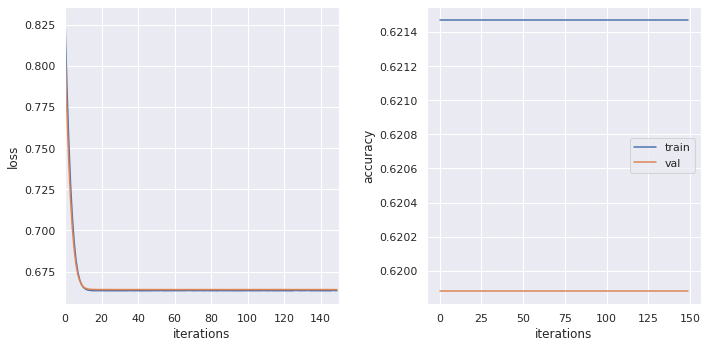

In [14]:
# First example
# Bad dummy model
model_1 = Sequential()
model_1.add(Dense(1, input_dim=2, activation='tanh'))
model_1.add(Dense(2, activation='sigmoid'))

model_1.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

history_1 = model_1.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=150, verbose=0)

_, train_acc = model_1.evaluate(X_train, Y_train, verbose=1)
_, test_acc = model_1.evaluate(X_test, Y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plot_training_curve(history_1)

# It is 66% correct, because it only has 66% Red spot correct

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

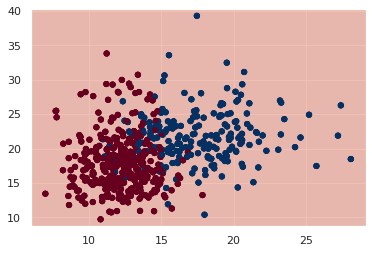

In [15]:
plot_decision_boundary(X.values, Y, model_1, enc, cmap='RdBu')
# You must inspect how model looks like 
# It is 66% correct, because it only has 66% Red spot correct,  No blue predicted at all 

11/11 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8827
Train: 0.906, Test: 0.883


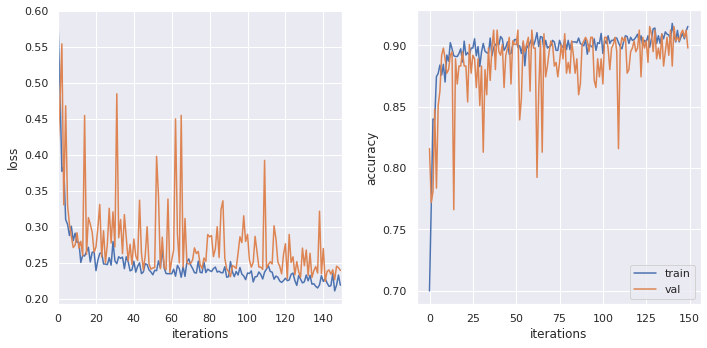

In [32]:
# Second example
model_2 = Sequential()
model_2.add(Dense(200, input_dim=2, activation='tanh'))
model_2.add(Dense(150, activation='tanh'))
model_2.add(Dense(100, activation='tanh'))
model_2.add(Dense(50, activation='tanh'))
model_2.add(Dense(35, activation='tanh'))
model_2.add(Dense(25, activation='tanh'))
model_2.add(Dense(15, activation='tanh'))
model_2.add(Dense(5, activation='tanh'))
model_2.add(Dense(2, activation='sigmoid'))

model_2.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

history_2 = model_2.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=150, verbose=0)

_, train_acc = model_2.evaluate(X_train, Y_train, verbose=1)
_, test_acc = model_2.evaluate(X_test, Y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
plot_training_curve(history_2)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

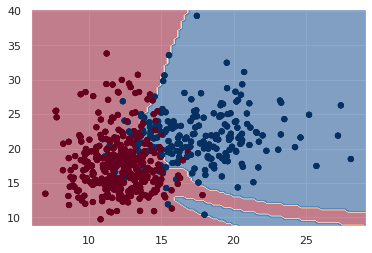

In [33]:
plot_decision_boundary(X.values, Y, model_2, enc, cmap='RdBu')